In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [3]:
from IPython.html.widgets import interact
from mpl_toolkits.mplot3d import Axes3D


/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
#r = linspace(0, 25)
from astropy import constants
G = constants.G
G = G.value

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [38]:
def mass_plummer(a, M, R):
    r = linspace(0, R)
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    plt.plot(r, Mass, lw=3, alpha=0.7)
    plt.xlim(0, R)
   
def rho_plummer(a, M, R):
    r = linspace(0, R)
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5./2.)
    plt.plot(r, rho, lw=3, alpha=0.7)
    plt.xlim(0, R)

def potential_plummer(a, M, R):
    r = linspace(0, R)
    phi =  - G*M / np.sqrt(r**2 + a**2)
    plt.plot(r, phi, lw=3, alpha=0.7)
    plt.xlim(0, R)

def vc_plummer(a, M, R):
    r = linspace(0, R)
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    plt.plot(r, vc, lw=3, alpha=0.7)
    plt.xlim(0, R)
    plt.ylim(0, 5)

    
def MN_potential(a, b, G, M, r, z):
    z = z*units.kpc
    a = a*units.kpc
    b = b*units.kpc
    phi = - G*M / (np.sqrt(R**2 + ( a + np.sqrt( z**2 + b**2 ))**2 ) )
    return phi

def MN_density(angle, phi, a, b, M, R, Z):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    #ax.axis('off')
    r = linspace(-R, R)
    z = linspace(-Z, Z)
    r, z = np.meshgrid(r, z)
    rho = (b**2 * M / (4*np.pi)) * (a*r**2 + ( a + 3*(np.sqrt(z**2 + b**2)))*( a + np.sqrt(z**2 + b**2))**2 ) /( ( (r**2 + (a + np.sqrt(z**2 + b**2))**2)**(5./2.) * (z**2 + b**2)**(3./2.)) )
    lines = ax.plot_surface(r, z, rho,cmap=cm.YlGnBu_r, rstride=1, cstride=1,lw=0.1, alpha=0.5)
    ax.view_init(phi, angle)
    ax.axis('off')

    #return rho.value

def plot_graph(a, M, R, generator):
    g = generator(a, M, R)
    plt.show()

None

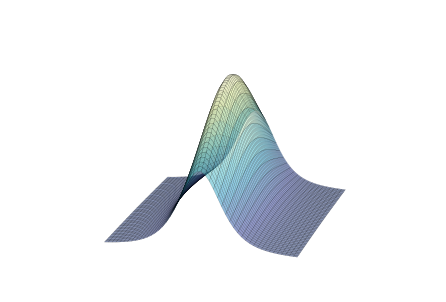

In [39]:
interact(MN_density, angle=(0.,360.), phi=(-90, 90), a=(1,10), b=(1, 10), M=(8e11, 2e12), R=(1, 50), Z=(1, 15), p=(0.0, 1.0, 0.001))

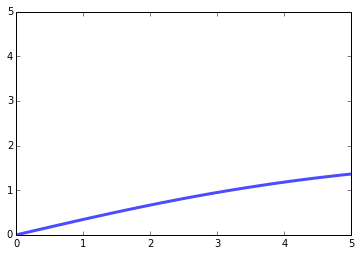

None

In [7]:
interact(plot_graph, a=(2,15), M=(8e11, 2e12),  R=(1, 50), p=(0.0, 1.0, 0.001),
        generator={'Mass': mass_plummer,
                   r'Density': rho_plummer,
                   r'Potential': potential_plummer,
                   u'Rotation curve': vc_plummer,
                   });


In [40]:
def Log_LM_potential(X, Y, Z, R, v0, phi, q, q1, q2):
    x = linspace(-X, X)
    y = linspace(-Y, Y)
    z = linspace(-Z, Z)
    r = linspace(1, R)
    c1 = ( (np.cos(phi)**2 / q1**2 ) +  ( np.sin(phi)**2 / q2**2 ) )
    c2 = ( (np.cos(phi)**2 / q2**2 ) + (np.sin(phi)**2 / q1**2))
    c3 = 2 * np.sin(phi) * np.cos(phi) * ( 1/q1**2 - 1/q2**2)
    Phi = v0**2 * log( (c1 * x**2) + (c2*y**2) + (c3*x*y) + ( r**2 * (z/q)**2) )
    x, y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    lines = ax.plot_surface(x, y, Phi, cmap=cm.coolwarm, rstride=1, cstride=1,lw=0.1, alpha=0.5)
    #ax.axis('off')


None

<function __main__.Log_LM_potential>

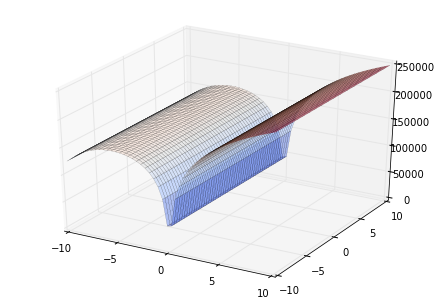

In [41]:
interact(Log_LM_potential, X=(0, 20), Y=(0, 20), Z=(0, 20), R=30, v0= (0, 300), phi=(0, 180), q=(0.6,1.8), q1=(0.6, 1.8), q2=1, p=(0.0, 1.0, 0.001))